AMZON REVIEWS

In [23]:
import numpy as np
import pandas as pd
import datetime
import csv
import os
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import time
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [2]:
df1=pd.read_csv('20190928-items.csv')
df2=pd.read_csv('20190928-reviews.csv')

In [3]:
df1

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,https://www.amazon.com/Nokia-6500-Slide-silver...,https://m.media-amazon.com/images/I/41ss4HpLkL...,2.4,https://www.amazon.com/product-reviews/B00198M12M,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN
5,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.2,https://www.amazon.com/product-reviews/B001DCJAJG,12,NaN
6,B001DZY4KI,Sony,Sony Ericsson G700 Triband GSM Phone Bronze (U...,https://www.amazon.com/Sony-Ericsson-Triband-B...,https://m.media-amazon.com/images/I/51mL10Inzc...,2.0,https://www.amazon.com/product-reviews/B001DZY4KI,1,$78.99
7,B001GQ3DJM,Nokia,Nokia 1680 Black Phone (T-Mobile),https://www.amazon.com/Nokia-1680-Black-Phone-...,https://m.media-amazon.com/images/I/41X4VeqkFO...,2.7,https://www.amazon.com/product-reviews/B001GQ3DJM,3,NaN
8,B0027VKQPE,Nokia,Nokia New 1100 for Tracfone,https://www.amazon.com/New-Nokia-1100-for-Trac...,https://m.media-amazon.com/images/I/91IUe3nDP7...,3.2,https://www.amazon.com/product-reviews/B0027VKQPE,8,$99.99
9,B00280QJFU,Samsung,Samsung T301G Prepaid Phone (Tracfone),https://www.amazon.com/Samsung-T301G-Prepaid-P...,https://m.media-amazon.com/images/I/71QX+Kiri4...,3.5,https://www.amazon.com/product-reviews/B00280QJFU,133,$59.89


In [4]:
df2

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
5,B0000SX2UC,J. White,4,"September 25, 2005",False,Worked great for me,"Hello, I have this phone and used it until I d...",NaN
6,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0
7,B0000SX2UC,Matt,4,"April 3, 2004",False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0
8,B0000SX2UC,Charles Cook,5,"November 24, 2003",False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0
9,B0000SX2UC,Amazon Customer,3,"February 2, 2004",False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0


#EDA

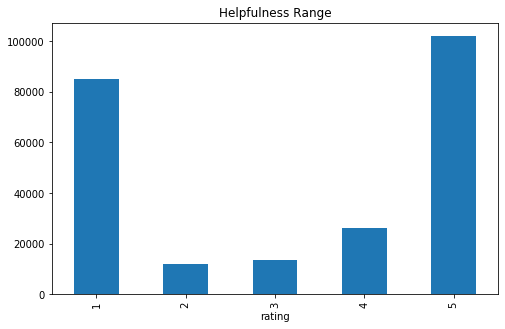

In [5]:
df2.groupby('rating')['helpfulVotes'].sum().plot(kind='bar',figsize=(8, 5),
                                                 title="Helpfulness Range")

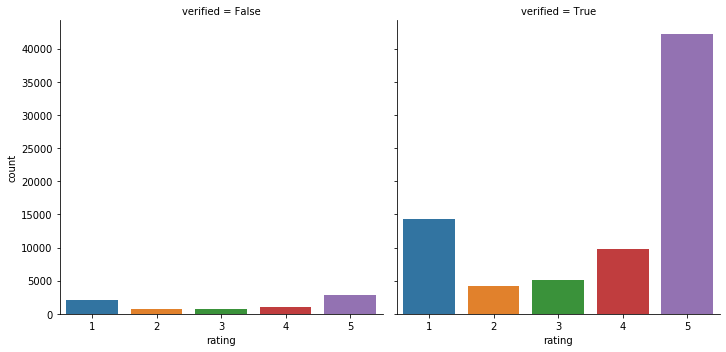

In [7]:
sns.catplot(x="rating",col="verified",data=df2,kind="count");

CLASSIFIER: LEARNING RATINGS

In [24]:
df2 = df2.drop(columns = ['helpfulVotes'])
df2 = df2.dropna() # for vectorization
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82780 entries, 0 to 82814
Data columns (total 7 columns):
asin        82780 non-null object
name        82780 non-null object
rating      82780 non-null int64
date        82780 non-null object
verified    82780 non-null bool
title       82780 non-null object
body        82780 non-null object
dtypes: bool(1), int64(1), object(5)
memory usage: 4.5+ MB


In [25]:
a = df2['body'].tolist()
b= df2['rating'].tolist()

In [26]:
def balance_classes(xs, ys):
    freqs = Counter(ys)
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if num_added[y] < max_allowable:
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] += 1
    return new_xs, new_ys

In [27]:
print(Counter(b))
balanced_x, balanced_y = balance_classes(a,b)
print(Counter(balanced_y))

Counter({5: 44991, 1: 16422, 4: 10708, 3: 5754, 2: 4905})
Counter({3: 4905, 1: 4905, 5: 4905, 4: 4905, 2: 4905})


In [30]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
time = datetime.datetime.now()
v = vectorizer.fit_transform(balanced_x)
print(datetime.datetime.now() - time)

0:00:10.809615


In [34]:
X_train, X_test, y_train, y_test = train_test_split(v, balanced_y, test_size=0.20, random_state=50)

#LINEAR CLASSIFIER

In [35]:
c1 = LinearSVC()
time = datetime.datetime.now()
c1.fit(X_train, y_train)
print(datetime.datetime.now() - time)

0:00:05.254780


#LOGISTIC MODEL

In [38]:
c2 = LogisticRegression()
time = datetime.datetime.now()
c2.fit(X_train, y_train)
print(datetime.datetime.now() - time)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0:00:09.030714


#MultinomialNB Classifier

In [37]:
c3 = MultinomialNB()
time = datetime.datetime.now()
c3.fit(X_train, y_train)
print(datetime.datetime.now() - time)

0:00:00.166652


In [39]:
preds = c3.predict(X_test)
print("MultinomialNB: ",list(preds[:10]))
print("Actual: ",y_test[:10])

MultinomialNB:  [3, 2, 3, 2, 5, 4, 5, 4, 1, 4]
Actual:  [4, 5, 2, 3, 5, 4, 5, 5, 1, 3]


In [40]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.65      0.59      0.62       968
           2       0.39      0.66      0.49       987
           3       0.48      0.29      0.36      1012
           4       0.51      0.40      0.45       962
           5       0.68      0.70      0.69       976

    accuracy                           0.53      4905
   macro avg       0.54      0.53      0.52      4905
weighted avg       0.54      0.53      0.52      4905



#Topic Modelling

In [8]:
def word_freq_dict(text):
    wordList = text.split()
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.05, stop_words="english")
n_topics=10
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=50, 
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [12]:
def print_topn_words(model, feature_names, topn):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-topn - 1:-1]])
        print(message)
    print()

In [13]:
df3= pd.merge(df2,df1, how="left", left_on="asin", right_on="asin")

In [47]:
apple = df3[df3["brand"]=="Apple"].sort_values(by=["date"], ascending=False)
samsung = df3[df3["brand"]=="Samsung"].sort_values(by=["date"], ascending=False)
xiaomi = df3[df3["brand"]=="Xiaomi"].sort_values(by=["date"], ascending=False)

In [50]:
t_1= time.time()
xiaomi_reviews = tfidf_vectorizer.fit_transform(xiaomi["body"])
xiaomi_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(xiaomi_reviews)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Xiaomi.".format(n_topics))
print_topn_words(lda, xiaomi_feature_names, 10)

Below is the output from LDA model with 10 topics (each includes Top10 words) for Xiaomi.
Topic #0: excelente la el android muy ve xiaomi mobile screen amazing
Topic #1: good battery phone price life amazing great screen camera fast
Topic #2: muy el xiaomi ve android la excelente mobile love phone
Topic #3: nice phone really works good price great doesn camera like
Topic #4: better quality phone price works camera work good android xiaomi
Topic #5: phone best phones android ve apps screen camera battery like
Topic #6: far like just phone good price great screen bought fast
Topic #7: phone great money xiaomi time work use buy mobile bought
Topic #8: don like camera really doesn screen use battery phone time
Topic #9: love excellent phone camera fast great price buy screen quality

